# Learning as inference

In [254]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
#import pymc as pm
#import arviz as az
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
import imageio
import warnings
import random
warnings.filterwarnings("ignore")

### Problem 6.1

We build on the case study of inferring a Bernoulli probability in Section 6.2. We noted that the probability of rain the next day was given by the posterior mean estimate, and was different from the most probable value of the rainfall rate, r, on the island, which is the MAP
estimate.

a) Suppose you have been on the island for 4 days, and it has rained only once. Show that the
MAP estimate for r is 0.25 and, according to Laplace’s rule of succession (Eq. (6.14)), the
posterior mean estimate is 0.33.

b) Explain intuitively why it makes sense that your estimate for the probability of rain the next
day is different from (and, in this case, greater than) your estimate of the most probable
rainfall rate.

c) Verify Eq. (6.14) numerically, by discretizing r into several hundred or thousand values
equally spaced between 0 and 1. Given 1 rainy day out of 4, calculate the likelihood for each
r value, and enter these into Bayes’ formula with a uniform prior. Calculate the posterior
mean as ∑rp(r|x).

In [5]:
#part a
n_rain = 1
t = 4
r_pm = (n_rain+1)/(t + 2)
r_map = n_rain/t
estimate = [r_pm, r_map]
estimate

[0.3333333333333333, 0.25]

part b

One could explain this by describing the difference between mean and mode. PME is the mean of posterior, and MAP is the mode of the posterior.
Second, the rainfall rate does not change over a long period of time (our assumption), but posterior mean estimate depends on the samples or observations.

In [103]:
# Part c
dry = 3  # Number of dry days
rain = 1  # Number of rainy days
r_values = np.linspace(0, 1, 1000)
likelihood = (r_values**rain)*((1 - r_values)**dry)
prior = np.ones_like(r_values)
posterior = likelihood*prior/ np.trapz((likelihood*prior), r_values)

In [105]:
posterior_mean = np.trapz(r_values * posterior, r_values)
posterior_mean

0.3333338900020407

### Problem 6.3 

We start with Eq. (6.8) for the posterior over r in the island case study.

a) Write down an expression for the posterior over r if you observe only rain days.

b) Plot this posterior for nrain = 1,2,5,10 (four curves in the same plot).

c) How long would it take to convince you that the posterior mean of r is greater than 90%?

p_m for 1 is 0.16666666666666666
p_m for 2 is 0.25
p_m for 5 is 0.5
p_m for 10 is 0.9166666666666666


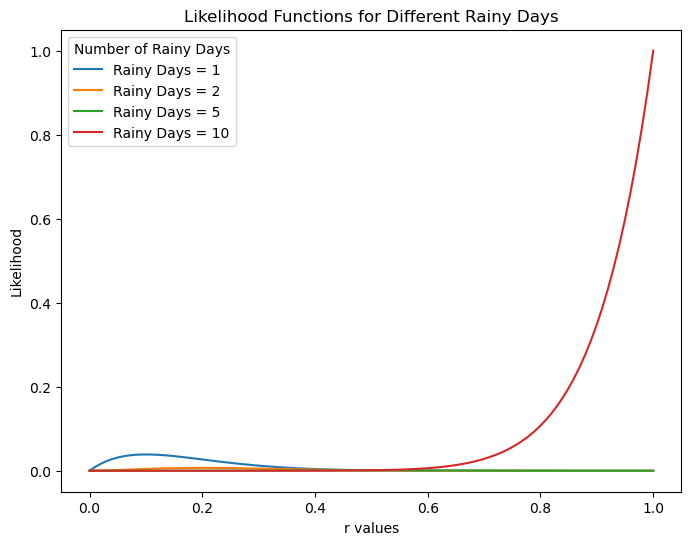

In [188]:
rain_day = [1,2,5,10]
n = 10
r_values = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
for i in range(len(rain_day)):
    liklihood = (r_values**rain_day[i]) * ((1 - r_values)**(n -rain_day[i]))
    p_m = (rain_day[i]+1)/(n + 2)
    print(f'p_m for {rain_day[i]} is {p_m}')
    sns.lineplot(x=r_values, y=liklihood, label=f'Rainy Days = {rain_day[i]}')

plt.title('Likelihood Functions for Different Rainy Days')
plt.xlabel('r values')
plt.ylabel('Likelihood')
plt.legend(title='Number of Rainy Days')
plt.grid(False)
plt.show()

<b> Problem 6.4 <b> 
This problem builds on Sections 5.5 and 6.3. Evidence accumulation can be formulated as a learning rule.

a) Show through a mathematical derivation that the posterior mean estimate can be written
recursively as $s\hat t+1 = sˆ+λt+1(xt+1 − sˆt)$, and find an expression for the “learning rate” λt in
terms of σ and t.

b) Does the learning rate increase or decrease as time goes by? Explain intuitively why this
makes sense.

c) Generalize (a) and (b) to the situation where each measurement xt has its own variance σt2.

1. **Prior Distribution**: Let's assume the prior distribution p(s) is Gaussian with mean mu_t and variance  \sigma_t^2.

$ p(s) \sim \mathcal{N}(\mu_t, \sigma_t^2) $

$p(x_{t+1} | s) \sim \mathcal{N}(s, \sigma^2)$

updated mean : is given by the weighted average of the prior mean $mu_t$ and the new measurement $x_{t+1}$:

$\mu_{t+1} = \mu_t + \lambda_{t+1} (x_{t+1} - \mu_t)$

2. **Learning Rate $\lambda_{t+1}$**: The learning rate can be derived from the variances. It is the proportion of the new measurement variance to the total variance.

$\lambda_{t+1} = \frac{\sigma_t^2}{\sigma_t^2 + \sigma^2}$

Now, we need to update the variance $\sigma_{t+1}^2$ :

$\sigma_{t+1}^2 = \left( \frac{1}{\sigma_t^2} + \frac{1}{\sigma^2} \right)^{-1}$

3. **Recursive Posterior Mean Estimate**:

$\hat{s}_{t+1} = \hat{s}_t + \lambda_{t+1} (x_{t+1} - \hat{s}_t)$

6. **Expression for  $\lambda_t \$**: From the above equation,

$\lambda_{t+1} = \frac{\sigma_t^2}{\sigma_t^2 + \sigma^2}$

$\hat{s}_{t+1} = \hat{s}_t + \frac{\sigma_t^2}{\sigma_t^2 + \sigma^2}(x_{t+1} - \hat{s}_t)$



Posterior means: [0, 2.5, 2.888888888888889, 3.0823529411764703, 3.131805157593123, 3.1783741120757694]
Posterior variances: [1, 0.5, 0.4444444444444444, 0.4235294117647059, 0.41260744985673353, 0.40590821964144774]
Learning rate: [0.01623632878565791, 0.5, 0.1111111111111111, 0.047058823529411764, 0.025787965616045846, 0.01623632878565791]


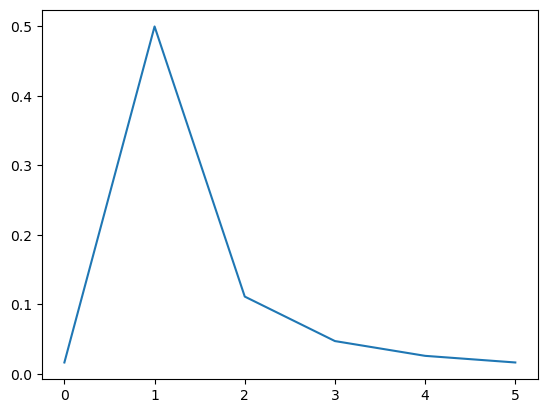

In [295]:
#PART b
mu = 0  # Initial mean
sigma = 1  # Initial variance

# Measurement variances (can be different for each measurement)
measurement_variances = [1, 2, 3, 4, 5]  # Example variances
measurements_rainy = [5, 6, 7, 6, 5]  # Example measurements

# Initialize lists to store posterior means and variances
posterior_means = [mu]
posterior_variances = [sigma]
Learning_rate = [lambda_t]

# Recursive Bayesian update
for t, (xt, sigma_t) in enumerate(zip(measurements, measurement_variances)):
    lambda_t = posterior_variances[-1] / (posterior_variances[-1] + sigma_t**2)
    mu_t = posterior_means[-1] + lambda_t * (xt - posterior_means[-1])
    sigma_t = (1 / (1 / posterior_variances[-1] + 1 / sigma_t**2))
    
    
    posterior_means.append(mu_t)
    posterior_variances.append(sigma_t)
    Learning_rate.append(lambda_t)


sns.lineplot(Learning_rate)
print("Posterior means:", posterior_means)
print("Posterior variances:", posterior_variances)
print("Learning rate:", Learning_rate)

**Part b**

The learning rate $ \lambda_t $ decreases as time goes by. This is because as more measurements are taken, the variance of the posterior distribution $ \sigma_t^2 $ decreases. Intuitively, the more evidence we accumulate, the more confident we become in our estimate, thus the impact of each new measurement diminishes over time.

### Problem 6.5 

We build on Section 6.4 for learning the precision parameter of a Gaussian distribution.

a) Using the posterior in Eq. (6.33), find an expression for the posterior mean estimate.

b) Interpret this expression.

c) Is it possible to write the updating of the posterior mean estimate of Js in Rescorla-Wagner
form, similar to Section 6.2.2? If not, why not?

d) Find an expression for the posterior standard deviation.

e) Modify Eq. (6.33) if the learner has a prior p(Js) that is a gamma distribution with scaleparameter k0 and shape parameter θ0.

f) Modify the answers to parts (a), (b), and (d) accordingly.

---------------------------------------------------------------------------------------------------------------
**Note** 

In gamma distribution: a = k = shape parameter, and b = $\frac{1}{\theta}$ = rate parameter

Refrence:  https://en.wikipedia.org/wiki/Gamma_distribution

(a) Expression for the Posterior Mean Estimate
The given posterior distribution is:

$p(J_s \mid s_1, \ldots, s_t) \propto J_s^{\frac{t}{2}} e^{-\frac{J_s}{2} \sum_{i=1}^{t} (s_i - \mu)^2} $

To find the posterior mean estimate, we need to consider the form of this distribution. The posterior mean estimate is given by the expected value of $J_s$ given the data $ s_1, \ldots, s_t$. For a Gamma-distributed variable with shape parameter k and scale parameter $\theta $, the mean is <span style='color:Red'>  $ {k}{\theta}$. </span>


Thus, the posterior mean estimate is:

<span style='background :yellow' >  $ \hat{J_s} =  {k}{\theta} = \frac{\frac{t}{2} + 1}{\frac{1}{2} \sum_{i=1}^{t} (s_i - \mu)^2} $ </span>

(b) Interpretation of the Expression
The posterior mean estimate $ \hat{J_s} $ depends on the number of observations $ t $ and the sum of the squared deviations of the observations $ s_i $ from the mean $ \mu $. As the number of observations increases, the estimate becomes more precise. The posterior mean $ \hat{J_s} $ is inversely proportional to the variance of the observations.

(c) Rescorla-Wagner Form
It is not possible to write the updating of the posterior mean estimate $ \hat{J_s} $ in Rescorla-Wagner form. <span style='color:Red'> The Rescorla-Wagner model is typically used for learning rules with a linear form of error correction, whereas our posterior mean estimate involves a non-linear function of the sum of squared deviations. </span>

(d) Posterior Standard Deviation
The standard deviation for a Gamma distribution with shape parameter $ \alpha $ and rate parameter $ \beta $ is given by:

$ \sigma = \sqrt{\frac{\alpha}{\beta^2}} $

Using our identified parameters:

$ \sigma = \sqrt{\frac{\frac{t}{2} + 1}{\left( \frac{1}{2} \sum_{i=1}^{t} (s_i - \mu)^2 \right)^2}} $

(e) Modified Posterior with Gamma Prior
If the learner has a prior $ p(J_s) $ that is a Gamma distribution with scale parameter $ k_0 $ and shape parameter $ \theta_0 $, the posterior distribution becomes:

$ p(J_s \mid s_1, \ldots, s_t) \propto J_s^{k_0 + \frac{t}{2} - 1} e^{-J_s \left( \theta_0 + \frac{1}{2} \sum_{i=1}^{t} (s_i - \mu)^2 \right)} $

(f) Modified Posterior Mean and Standard Deviation
Using the modified parameters:

$ \alpha' = k_0 + \frac{t}{2} $
$ \beta' = \theta_0 + \frac{1}{2} \sum_{i=1}^{t} (s_i - \mu)^2 $

The posterior mean estimate is:

$ \hat{J_s} = \frac{\alpha'}{\beta'} = \frac{k_0 + \frac{t}{2}}{\theta_0 + \frac{1}{2} \sum_{i=1}^{t} (s_i - \mu)^2} $

The posterior standard deviation is:

$ \sigma = \sqrt{\frac{\alpha'}{\beta'^2}} = \sqrt{\frac{k_0 + \frac{t}{2}}{\left( \theta_0 + \frac{1}{2} \sum_{i=1}^{t} (s_i - \mu)^2 \right)^2}} $


### Problem 6.6 

Create a movie in which each frame corresponds to a trial in learning the slopeparameter k in the relation F = ks (see Section 6.5). The toddler performs 20 trials. On eachtrial, she sends a command s that is drawn from a uniform distribution on [2,10], and her forcemeasurement is drawn from a Gaussian distribution with mean 1.5s and standard deviation 2.The prior over k is flat. Each frame should look like a row in Fig. 6.7: (center) the likelihoodfunction over k computed from the measurement on the tth trial; (right) the posterior based on themeasurements made up to and including the tth trial; (left) a graphical representation of the data,with the line corresponding to the posterior mean estimate of k based on the measurements made upto and including the tth trial. Make sure that the axes do not change from frame to frame. Choosethe ranges on both axes large enough. Make sure that the numbers on the axes are easily legibleand that the lines in your plots are sufficiently thick. Save your movie.

In [279]:
# Parameters
num_trials = 20
true_slope = 1.5
sigma = 2
command_signals = np.random.uniform(2, 10, num_trials)
force_measurements = np.random.normal(true_slope * command_signals, sigma)

# Range of k values
k_values = np.linspace(0, 3, 1000)
prior = np.ones_like(k_values)  # Flat prior


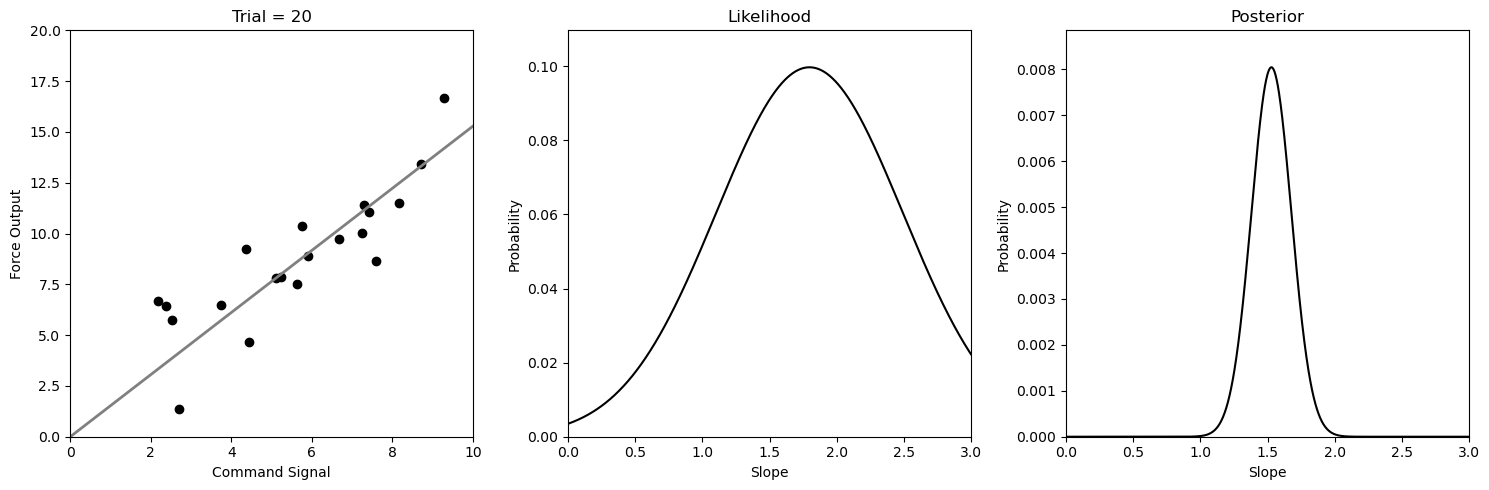

In [281]:
# Parameters
num_trials = 20
true_slope = 1.5
sigma = 2
command_signals = np.random.uniform(2, 10, num_trials)
force_measurements = np.random.normal(true_slope * command_signals, sigma)

# Range of k values
k_values = np.linspace(0, 3, 1000)
prior = np.ones_like(k_values)  # Flat prior

# Initialize posterior
posterior = prior.copy()

# Store frames for the movie
frames = []

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


for t in range(num_trials):
    # Current command signal and force measurement
    s_t = command_signals[t]
    f_t = force_measurements[t]

    # Compute likelihood
    #p(ft|k,st) = N(ft:kst,sigma^2)
    #-------------------------------Page 136--------------------------------------------
    likelihood = norm.pdf(f_t, loc=k_values * s_t, scale=sigma**2)


    #-------------------------------Page 137--------------------------------------------
    # Update posterior
    posterior *= likelihood
    posterior /= np.sum(posterior)  # Normalize posterior
    
    # Compute posterior mean
    posterior_mean = np.sum(k_values * posterior)
    
    # Plot data points and posterior mean line
    ax1.clear()
    ax1.scatter(command_signals[:t+1], force_measurements[:t+1], color='black')
    ax1.plot([0, 10], [0, 10 * posterior_mean], color='gray', linewidth=2)
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 20)
    ax1.set_xlabel('Command Signal')
    ax1.set_ylabel('Force Output')
    ax1.set_title(f'Trial = {t+1}')
    
    # Plot likelihood
    ax2.clear()
    ax2.plot(k_values, likelihood, color='black')
    ax2.set_xlim(0, 3)
    ax2.set_ylim(0, np.max(likelihood) * 1.1)
    ax2.set_xlabel('Slope')
    ax2.set_ylabel('Probability')
    ax2.set_title('Likelihood')

    # Plot posterior
    ax3.clear()
    ax3.plot(k_values, posterior, color='black')
    ax3.set_xlim(0, 3)
    ax3.set_ylim(0, np.max(posterior) * 1.1)
    ax3.set_xlabel('Slope')
    ax3.set_ylabel('Probability')
    ax3.set_title('Posterior')
    
    # Save frame
    plt.tight_layout()
    fig.canvas.draw()
    
    # Convert plot to image
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)


imageio.mimsave('learning_slope_movie.gif', frames, fps=2)
